In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trip = pd.read_csv('/home/kyohei/bike_share_data/201608_trip_data.csv')

station = pd.read_csv('/home/kyohei/bike_share_data/201608_station_data.csv')

In [3]:
#サンフランシスコ発のデータに限定
station_sub = station[['station_id','landmark']]

station_sub_sf = station_sub[station_sub['landmark']=='San Francisco']

trip_merge_landmark = trip.merge(station_sub_sf,left_on='Start Terminal',right_on='station_id',how='inner')

In [4]:
#日付データの変換
trip_merge_landmark['Start Date'] = trip_merge_landmark['Start Date'].apply(lambda x:pd.to_datetime(x))

#曜日データの付与
trip_merge_landmark['dayofweek'] = trip_merge_landmark['Start Date'].apply(lambda x:x.dayofweek)

#日付データの付与
trip_merge_landmark['start_date'] = trip_merge_landmark['Start Date'].apply(lambda x:x.date())

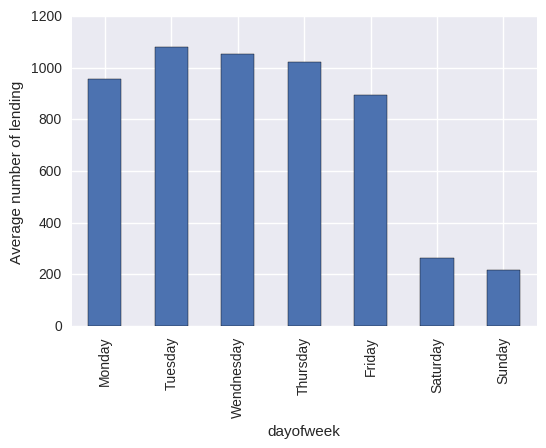

In [10]:
#曜日別の一日平均利用回数（スタートベース、San Francisco地区）
trip_merge_landmark_groupby_date = pd.DataFrame(trip_merge_landmark.groupby(['start_date','dayofweek']).size()).reset_index()

trip_merge_landmark_groupby_date.groupby('dayofweek')[0].mean().plot(kind='bar')

plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Average number of lending')

In [12]:
#時間データの付加
trip_merge_landmark['hour'] = trip_merge_landmark['Start Date'].apply(lambda x:x.time().hour)

In [13]:
#曜日別の平均貸出数推移の作成
#日付別、曜日別、時間別貸出数の算出
trip_merge_landmark_group_date_hour = pd.DataFrame(trip_merge_landmark.groupby(['start_date','dayofweek','hour']).size()).reset_index()

#曜日別、時間別、平均貸出数の算出
plot_data = pd.DataFrame(trip_merge_landmark_group_date_hour.groupby(['dayofweek','hour'])[0].mean()).reset_index()

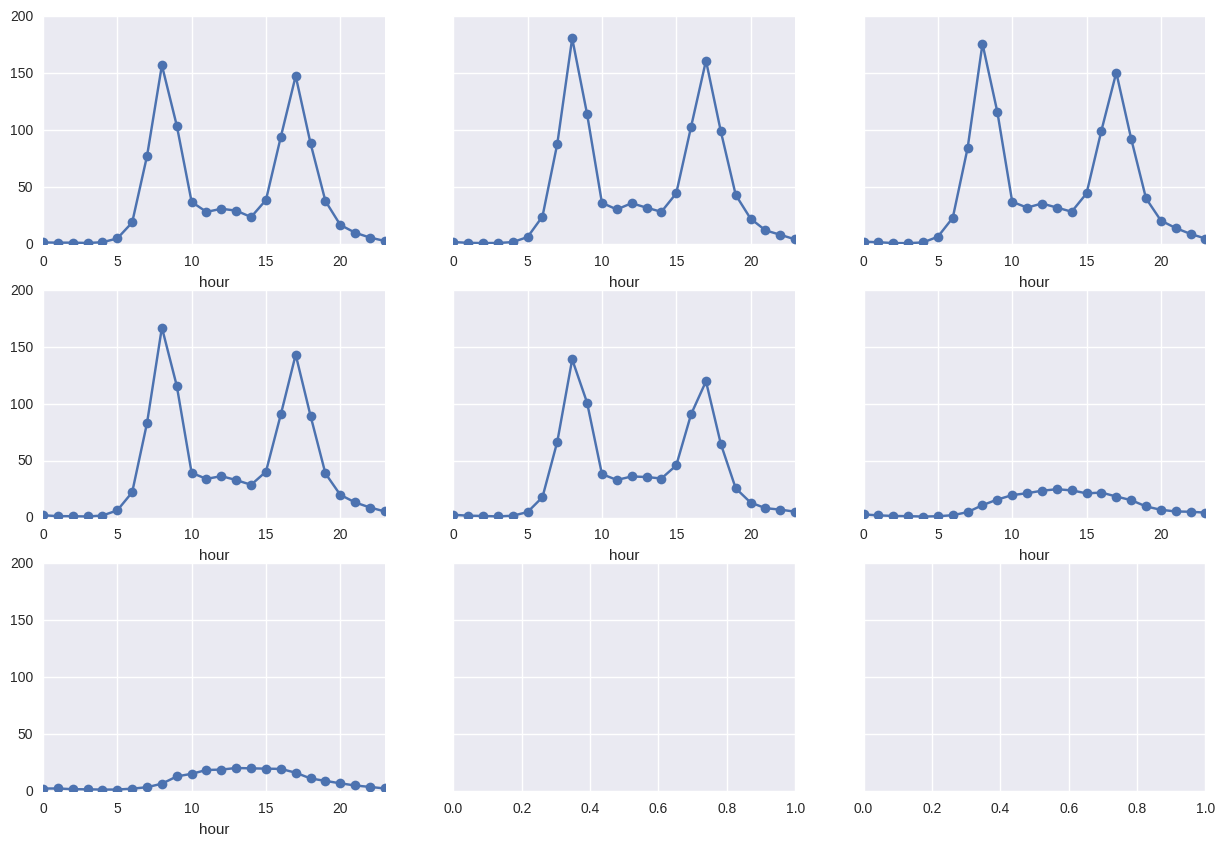

In [27]:
fig, axes = plt.subplots(3,3,figsize=(15,10),sharey='all')
dayofweeks = [0,1,2,3,4,5,6]
targets = zip(dayofweeks,axes.flatten())

for (dayofweek,ax) in targets:
    plot_data[plot_data['dayofweek']==dayofweek].plot('hour',0,ax=ax,style='-o',legend=False)
    
axes[0][1].set_ylabel('Average number of lending')

In [10]:
#平日データに限定
trip_merge_landmark_weekday = trip_merge_landmark[trip_merge_landmark.dayofweek<=4]

In [15]:
#利用数top
start_station_ranking = trip_merge_landmark_weekday.groupby(['Start Terminal','Start Station']).size().sort_values(ascending=False)
start_station_ranking.head()

Start Terminal  Start Station                           
70              San Francisco Caltrain (Townsend at 4th)    22662
69              San Francisco Caltrain 2 (330 Townsend)     21593
50              Harry Bridges Plaza (Ferry Building)        14090
61              2nd at Townsend                             12876
74              Steuart at Market                           12795
dtype: int64

In [12]:
start_station_ranking.mean()

7095.8378378378375

In [16]:
#返却数top
end_station_ranking = trip_merge_landmark_weekday.groupby(['End Terminal','End Station']).size().sort_values(ascending=False)
end_station_ranking.head()

End Terminal  End Station                             
70            San Francisco Caltrain (Townsend at 4th)    27831
69            San Francisco Caltrain 2 (330 Townsend)     22819
50            Harry Bridges Plaza (Ferry Building)        14916
61            2nd at Townsend                             14411
74            Steuart at Market                           13531
dtype: int64

In [14]:
end_station_ranking.mean()

6563.65

In [20]:
trip_merge_landmark_weekday[(trip_merge_landmark_weekday.hour>=7) & (trip_merge_landmark_weekday.hour<=9)].head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,station_id,landmark,dayofweek,start_date,hour
6,913529,563,2015-09-01 07:05:00,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 7:14,Market at Sansome,77,602,Subscriber,94303,69.0,San Francisco,1,2015-09-01,7
7,913565,461,2015-09-01 07:21:00,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 7:28,Yerba Buena Center of the Arts (3rd @ Howard),68,496,Subscriber,94042,69.0,San Francisco,1,2015-09-01,7
8,913568,519,2015-09-01 07:22:00,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 7:31,Howard at 2nd,63,517,Subscriber,94025,69.0,San Francisco,1,2015-09-01,7
9,913569,503,2015-09-01 07:22:00,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 7:31,Howard at 2nd,63,465,Subscriber,94062,69.0,San Francisco,1,2015-09-01,7
10,913571,740,2015-09-01 07:23:00,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 7:35,Davis at Jackson,42,390,Subscriber,94158,69.0,San Francisco,1,2015-09-01,7


### 平日の時間帯別の利用数、返却数ランキング

In [59]:
#AM7-9のスタートランキング
sub_data = trip_merge_landmark_weekday[(trip_merge_landmark_weekday.hour>=7) & (trip_merge_landmark_weekday.hour<=9)]
AM_start_station_ranking = pd.DataFrame(sub_data.groupby(['Start Terminal','Start Station']).size().sort_values(ascending=False)).reset_index()
AM_start_station_ranking.rename(columns={0:'Start Count'},inplace=True)
AM_start_station_ranking.head()

,Start Terminal,Start Station,Start Count
0,69,San Francisco Caltrain 2 (330 Townsend),14048
1,70,San Francisco Caltrain (Townsend at 4th),13136
2,50,Harry Bridges Plaza (Ferry Building),7624
3,55,Temporary Transbay Terminal (Howard at Beale),6661
4,74,Steuart at Market,5786


In [60]:
#AM7-9の到着ランキング
AM_end_station_ranking = pd.DataFrame(sub_data.groupby(['End Terminal','End Station']).size().sort_values(ascending=False)).reset_index()
AM_end_station_ranking.rename(columns={0:'End Count'},inplace=True)
AM_end_station_ranking.head(10)

,End Terminal,End Station,End Count
0,70,San Francisco Caltrain (Townsend at 4th),6558
1,61,2nd at Townsend,6513
2,65,Townsend at 7th,6047
3,60,Embarcadero at Sansome,4739
4,63,Howard at 2nd,4150
5,74,Steuart at Market,4120
6,77,Market at Sansome,4070
7,51,Embarcadero at Folsom,4046
8,50,Harry Bridges Plaza (Ferry Building),3807
9,69,San Francisco Caltrain 2 (330 Townsend),3790


In [63]:
#AM7-9、需要供給バランス
AM_merge_data = pd.merge(AM_start_station_ranking,AM_end_station_ranking,left_on='Start Terminal',right_on='End Terminal')
AM_merge_data['balance'] = AM_merge_data.apply(lambda x:x['End Count']-x['Start Count'],axis=1)

In [65]:
AM_merge_data.sort_values(by='balance')

,Start Terminal,Start Station,Start Count,End Terminal,End Station,End Count,balance
0,69,San Francisco Caltrain 2 (330 Townsend),14048,69,San Francisco Caltrain 2 (330 Townsend),3790,-10258
1,70,San Francisco Caltrain (Townsend at 4th),13136,70,San Francisco Caltrain (Townsend at 4th),6558,-6578
2,50,Harry Bridges Plaza (Ferry Building),7624,50,Harry Bridges Plaza (Ferry Building),3807,-3817
3,55,Temporary Transbay Terminal (Howard at Beale),6661,55,Temporary Transbay Terminal (Howard at Beale),3268,-3393
6,73,Grant Avenue at Columbus Avenue,3382,73,Grant Avenue at Columbus Avenue,268,-3114
8,54,Embarcadero at Bryant,2713,54,Embarcadero at Bryant,715,-1998
4,74,Steuart at Market,5786,74,Steuart at Market,4120,-1666
13,72,Civic Center BART (7th at Market),1941,72,Civic Center BART (7th at Market),817,-1124
19,71,Powell at Post (Union Square),1311,71,Powell at Post (Union Square),273,-1038
17,59,Golden Gate at Polk,1420,59,Golden Gate at Polk,655,-765


In [68]:
#16-18のスタートランキング
sub_data = trip_merge_landmark_weekday[(trip_merge_landmark_weekday.hour>=16) & (trip_merge_landmark_weekday.hour<=18)]
PM_start_station_ranking = pd.DataFrame(sub_data.groupby(['Start Terminal','Start Station']).size().sort_values(ascending=False)).reset_index()
PM_start_station_ranking.rename(columns={0:'Start Count'},inplace=True)
PM_start_station_ranking.head()

,Start Terminal,Start Station,Start Count
0,61,2nd at Townsend,5135
1,60,Embarcadero at Sansome,4644
2,70,San Francisco Caltrain (Townsend at 4th),4559
3,65,Townsend at 7th,4503
4,74,Steuart at Market,3878


In [69]:
PM_end_station_ranking = pd.DataFrame(sub_data.groupby(['End Terminal','End Station']).size().sort_values(ascending=False)).reset_index()
PM_end_station_ranking.rename(columns={0:'End Count'},inplace=True)
PM_end_station_ranking.head()

,End Terminal,End Station,End Count
0,70,San Francisco Caltrain (Townsend at 4th),14435
1,69,San Francisco Caltrain 2 (330 Townsend),14084
2,50,Harry Bridges Plaza (Ferry Building),6656
3,74,Steuart at Market,5975
4,55,Temporary Transbay Terminal (Howard at Beale),5311


In [72]:
PM_merge_data = pd.merge(PM_start_station_ranking,PM_end_station_ranking,left_on='Start Terminal',right_on='End Terminal')
PM_merge_data['balance'] = PM_merge_data.apply(lambda x:x['End Count']-x['Start Count'],axis=1)
PM_merge_data.sort_values(by='balance')

,Start Terminal,Start Station,Start Count,End Terminal,End Station,End Count,balance
5,63,Howard at 2nd,3641,63,Howard at 2nd,691,-2950
9,62,2nd at Folsom,3418,62,2nd at Folsom,673,-2745
3,65,Townsend at 7th,4503,65,Townsend at 7th,1889,-2614
8,64,2nd at South Park,3420,64,2nd at South Park,999,-2421
13,82,Broadway St at Battery St,2731,82,Broadway St at Battery St,560,-2171
17,48,Embarcadero at Vallejo,2303,48,Embarcadero at Vallejo,342,-1961
7,67,Market at 10th,3507,67,Market at 10th,1712,-1795
11,51,Embarcadero at Folsom,3222,51,Embarcadero at Folsom,1450,-1772
18,45,Commercial at Montgomery,2299,45,Commercial at Montgomery,574,-1725
1,60,Embarcadero at Sansome,4644,60,Embarcadero at Sansome,3057,-1587
